In [ ]:
import re
import nltk

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from sklearn.feature_selection.univariate_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import itertools

import sys
import os
import argparse
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import six
import tensorflow
from abc import ABCMeta
from scipy import sparse
from scipy.sparse import issparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y, check_array
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize, binarize, LabelBinarizer
from sklearn.svm import LinearSVC

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
plt.style.use('ggplot')
import sklearn.metrics as metrics

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.univariate_selection module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [ ]:
from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score
from xgboost import plot_importance
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.layers import Embedding, Dense, LSTM 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import rhinoMorph

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
rn = rhinoMorph.startRhino()

filepath:  /Users/Moon/opt/anaconda3/lib/python3.7/site-packages
classpath:  /Users/Moon/opt/anaconda3/lib/python3.7/site-packages/rhinoMorph/lib/rhino.jar
RHINO started!


In [ ]:
df1 = pd.read_excel('./학대별 라벨.xlsx', encoding = 'cp949')
df1
# 1 : 정석학대
# 2 : 신체학대
# 3 : 방임
# 4 : 성학대 

,번호,내용,Label
0,1,\n\t\t\t\t\t\t저는 고등학생 여자입니다7살때부터 가정폭력을 당해왔는데요엄...,1
1,2,\n\t\t\t\t\t\t20대 성인 여성입니다. 졸업을 목전에 두고 있는데 아빠의...,1
2,3,\n\t\t\t\t\t\t옛날부터 엄마가 아빠라는 사람한테 가정폭력을 당했습니다 여...,1
3,4,\n1년이라는 짧지 않은 시간 동안 결혼생활이 지옥같았고 그걸 마무리하려고 합니다남...,1
4,5,\n\t\t\t\t\t\t엄마가 돌돌이? 찍찍이로 방 청소 언제 할거냐 여쭤보셔서 ...,1
...,...,...,...
12325,12326,\n이제 예비고1인 학생입니다.요즘 살기가 싫어지네요사건의 전개는 이렇습니다아버지가...,1
12326,12327,\n\t\t\t\t\t\t부모님이 성적을 만족하시지못해요 절대만족하시는법이없죠 힘들...,1
12327,12328,\n저는 고1되는 여자입니다.저는 정말 살기가 싫어요..그렇다고 자살하는 건 바라지...,1
12328,12329,\n저진짜저희가족이해할수가없습니다저희아빠는저를못믿으시구요 저희엄마는 저랑 제동생을차...,1


In [ ]:
df1['Label'].value_counts()

2    5378
1    5267
4     975
3     710
Name: Label, dtype: int64

In [ ]:
labels = df1[['번호','Label']]
labels

,번호,Label
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
12325,12326,1
12326,12327,1
12327,12328,1
12328,12329,1


In [ ]:
classes = sorted(labels.Label.unique())
classes

[1, 2, 3, 4]

In [ ]:
df1.drop(['번호','Label'], axis = 1, inplace = True)
df1

,내용
0,\n\t\t\t\t\t\t저는 고등학생 여자입니다7살때부터 가정폭력을 당해왔는데요엄...
1,\n\t\t\t\t\t\t20대 성인 여성입니다. 졸업을 목전에 두고 있는데 아빠의...
2,\n\t\t\t\t\t\t옛날부터 엄마가 아빠라는 사람한테 가정폭력을 당했습니다 여...
3,\n1년이라는 짧지 않은 시간 동안 결혼생활이 지옥같았고 그걸 마무리하려고 합니다남...
4,\n\t\t\t\t\t\t엄마가 돌돌이? 찍찍이로 방 청소 언제 할거냐 여쭤보셔서 ...
...,...
12325,\n이제 예비고1인 학생입니다.요즘 살기가 싫어지네요사건의 전개는 이렇습니다아버지가...
12326,\n\t\t\t\t\t\t부모님이 성적을 만족하시지못해요 절대만족하시는법이없죠 힘들...
12327,\n저는 고1되는 여자입니다.저는 정말 살기가 싫어요..그렇다고 자살하는 건 바라지...
12328,\n저진짜저희가족이해할수가없습니다저희아빠는저를못믿으시구요 저희엄마는 저랑 제동생을차...


In [ ]:
label_to_cat = dict()
for i in range(len(classes)):
    dummy = np.zeros((len(classes),), dtype = 'int8')
    dummy[i] = 1
    label_to_cat[classes[i]] = dummy
    
label_to_cat
#변환이 잘된것을 확인 

{1: array([1, 0, 0, 0], dtype=int8),
 2: array([0, 1, 0, 0], dtype=int8),
 3: array([0, 0, 1, 0], dtype=int8),
 4: array([0, 0, 0, 1], dtype=int8)}

In [ ]:
y = np.array([label_to_cat[label] for label in labels.Label])
y
#y값을 위에서 지정한 것으로 해주고 y로 지정 

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]], dtype=int8)

In [ ]:
labels['Label'].value_counts()

2    5378
1    5267
4     975
3     710
Name: Label, dtype: int64

In [ ]:
def text_cleaning(doc):
    
    doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", doc)
        
    return doc

In [ ]:
def define_stopwords(path):
    
    SW = set() 
    #집합형태로 만들어줘야 중복을 제외하고 출력해줌
    #불용어들을 추가할려면 SW.add()이렇게 넣어주면 됨
    
    with open(path, encoding = 'cp949') as f:
        for word in f:
            SW.add(word)
            
    return SW

#with open을 통해 파일을 열고 해당 파일에 있는 단어들을 SW에 넣어줌 

In [ ]:
def text_tokenizing(doc):
    return [word for word in rhinoMorph.onlyMorph_list(rn,doc, pos = ['NNG', 'NNP','NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi = False) if word not in SW and len(word) > 1]

In [ ]:
SW = define_stopwords('./stopwords-ko_v1.txt')

In [ ]:
df1

,내용
0,\n\t\t\t\t\t\t저는 고등학생 여자입니다7살때부터 가정폭력을 당해왔는데요엄...
1,\n\t\t\t\t\t\t20대 성인 여성입니다. 졸업을 목전에 두고 있는데 아빠의...
2,\n\t\t\t\t\t\t옛날부터 엄마가 아빠라는 사람한테 가정폭력을 당했습니다 여...
3,\n1년이라는 짧지 않은 시간 동안 결혼생활이 지옥같았고 그걸 마무리하려고 합니다남...
4,\n\t\t\t\t\t\t엄마가 돌돌이? 찍찍이로 방 청소 언제 할거냐 여쭤보셔서 ...
...,...
12325,\n이제 예비고1인 학생입니다.요즘 살기가 싫어지네요사건의 전개는 이렇습니다아버지가...
12326,\n\t\t\t\t\t\t부모님이 성적을 만족하시지못해요 절대만족하시는법이없죠 힘들...
12327,\n저는 고1되는 여자입니다.저는 정말 살기가 싫어요..그렇다고 자살하는 건 바라지...
12328,\n저진짜저희가족이해할수가없습니다저희아빠는저를못믿으시구요 저희엄마는 저랑 제동생을차...


a = []
for i in df1['내용']:
    a.append(text_tokenizing(text_cleaning(i)))
    
df1['Token'] = pd.Series(a)
df1

In [ ]:
df1 = pd.read_csv('./df_tokenized.csv')
df1

,Unnamed: 0,내용,Token
0,0,\n\t\t\t\t\t\t저는 고등학생 여자입니다7살때부터 가정폭력을 당해왔는데요엄...,"['고등학생', '여자', '가정', '폭력', '당하', '엄마', '아빠', '..."
1,1,\n\t\t\t\t\t\t20대 성인 여성입니다. 졸업을 목전에 두고 있는데 아빠의...,"['성인', '여성', '졸업', '목전', '아빠', '가정', '폭력', '학업..."
2,2,\n\t\t\t\t\t\t옛날부터 엄마가 아빠라는 사람한테 가정폭력을 당했습니다 여...,"['옛날', '엄마', '아빠', '사람', '가정', '폭력', '당하', '여태..."
3,3,\n1년이라는 짧지 않은 시간 동안 결혼생활이 지옥같았고 그걸 마무리하려고 합니다남...,"['시간', '동안', '결혼', '생활', '지옥', '그것', '마무리', '남..."
4,4,\n\t\t\t\t\t\t엄마가 돌돌이? 찍찍이로 방 청소 언제 할거냐 여쭤보셔서 ...,"['엄마', '돌돌이', '찍찍이', '청소', '언제', '여쭈', '이따', '..."
...,...,...,...
12325,12325,\n이제 예비고1인 학생입니다.요즘 살기가 싫어지네요사건의 전개는 이렇습니다아버지가...,"['이제', '예비', '고이', '학생', '요즘', '사건', '전개', '이렇..."
12326,12326,\n\t\t\t\t\t\t부모님이 성적을 만족하시지못해요 절대만족하시는법이없죠 힘들...,"['부모', '성적', '만족', '시지', '못하', '절대', '족하', '힘들..."
12327,12327,\n저는 고1되는 여자입니다.저는 정말 살기가 싫어요..그렇다고 자살하는 건 바라지...,"['고되', '여자', '정말', '그렇', '자살', '바라지', '요하', '스..."
12328,12328,\n저진짜저희가족이해할수가없습니다저희아빠는저를못믿으시구요 저희엄마는 저랑 제동생을차...,"['저진', '저희', '저희', '엄마', '제동', '차별', '아빠', '엄마..."


In [ ]:
df_train, df_val, y_train, y_val = train_test_split(df1, y, test_size = 0.2, random_state = 42)

In [ ]:
df_train

,Unnamed: 0,내용,Token
1785,1785,\n안녕하세요. 졸업을 앞두고 있는 여학생 6학년 입니다.어디서 어떡해 정리해서 글...,"['안녕', '졸업', '앞두', '여학', '학년', '어디', '어떡하', '정..."
10407,10407,\n내담자 군인 22살(가해자) 여자친구 18살 고등학생(피해자)여자친구랑 교제한...,"['내담자', '군인', '가해자', '여자', '친구', '고등학생', '피해자'..."
286,286,"\n\t\t\t\t\t\t안녕하세요 수년간 엄청난 가정폭력을 아버지께 당해왔는데요,...","['안녕', '수년', '엄청나', '가정', '폭력', '아버지', '당하', '..."
6520,6520,\n우선지금제마음이너무견디기힘들기에도움을요청한거니까제발도움되는답변만주세요너무급해요....,"['우선', '지금', '너무', '힘들', '제발', '답변', '너무', '예전..."
12251,12251,\n저는 손자인데 할머니가 저만 싫어해요.5살때부터 쭉 그랫는데요 누나만 좋아하고 ...,"['손자', '할머니', '누나', '좋아하', '자기', '바치', '좋아하', ..."
...,...,...,...
11964,11964,\n엄마가 평소에 강아지를 무척이나 싫어하셨거든요;; 얼마나 싫어하는가하면... 강...,"['엄마', '평소', '강아지', '무척', '싫어하', '얼마', '강아지', ..."
5191,5191,\n\t\t\t\t\t\t04여자예요아까 공부하다가 자려고 폰을 옆에두고 불을껐는데...,"['여자', '공부', '에두고', '엄마', '갑자기', '들어오', '친구', ..."
5390,5390,\n\t\t\t\t\t\t안녕하세요 저는 개령중학교에다니고잇는데요 자꾸친구가때려요 ...,"['안녕', '자꾸', '친구', '때리', '선생', '때리', '그리고', '부..."
860,860,\n정말 엄마 때문에 너무 죽고 싶어요 엄마저한테 화풀이를 많이 하시거든요 그데 마...,"['정말', '엄마', '너무', '엄마', '화풀이', '많이', '마치', '학..."


In [ ]:
y_train

array([[1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       ...,
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0]], dtype=int8)

## X_Train과 y_train이 동일한 인덱스로 나누어졌는지 확인해보기

In [ ]:
max_words = 10000
t = Tokenizer(num_words = max_words)
t.fit_on_texts(df_train.내용)
#tokens을 넣던가 해보기
#내용을 넣던가 해보기 
vocab_size = len(t.word_index) + 1

In [ ]:
encoded_train_set = t.texts_to_sequences(df_train.내용)

In [ ]:
encoded_train_set

[[71,
  7675,
  9093,
  725,
  196,
  620,
  2019,
  332,
  597,
  2081,
  1996,
  1306,
  100,
  3854,
  38,
  4,
  5103,
  8,
  1,
  101,
  488,
  5904,
  156,
  12,
  89,
  492,
  41,
  4508,
  111,
  38,
  25,
  8100,
  1118,
  2,
  35,
  72,
  42,
  9094,
  4792,
  8101,
  31,
  2449,
  278,
  90,
  25,
  5104,
  2,
  35,
  837,
  28,
  3762,
  6367,
  1,
  42,
  9094,
  4792,
  1997,
  2,
  4,
  35,
  608,
  5694,
  6131,
  38,
  3,
  35,
  12,
  2,
  1420,
  69,
  215,
  84,
  96,
  8551,
  551,
  1404,
  15,
  466,
  84,
  42,
  351,
  5694,
  19,
  74,
  119,
  19,
  4262,
  8101,
  2801,
  42,
  351,
  96,
  2165,
  506,
  8102,
  2407,
  1,
  6963,
  554,
  893,
  1276,
  127,
  17,
  3,
  3855,
  5,
  1025,
  2707,
  382,
  213,
  3,
  4039,
  6659,
  119,
  30,
  555,
  2952,
  1620,
  301,
  1066,
  107,
  30,
  9095,
  132,
  207,
  386,
  6,
  869,
  1524,
  1443,
  1556,
  87,
  2,
  119,
  5695,
  2408,
  2450,
  649,
  127,
  21,
  1067,
  1118,
  87,
  1945,
  1040,

In [ ]:
df_train['Token'] = encoded_train_set

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
encoded = sum(encoded,[]) 
encoded

[17, 92, 709, 33, 57]

In [ ]:
df_train['Token']

1785     [71, 7675, 9093, 725, 196, 620, 2019, 332, 597...
10407    [8553, 5490, 2572, 2054, 3857, 784, 328, 13, 3...
286      [71, 3138, 1004, 5290, 991, 796, 238, 1050, 72...
6520                                                 [122]
12251    [5, 413, 239, 858, 1479, 1379, 239, 858, 932, ...
                               ...                        
11964    [2, 520, 674, 5202, 755, 464, 575, 5515, 66, 1...
5191     [2937, 3152, 1687, 2, 45, 4728, 9, 470, 10, 87...
5390     [71, 5, 13, 315, 13, 64, 199, 6960, 38, 299, 1...
860      [7, 17, 84, 4, 501, 266, 3282, 23, 3441, 1841,...
7270     [5, 884, 1, 2754, 417, 2007, 1291, 7363, 299, ...
Name: Token, Length: 9864, dtype: object

In [ ]:
df_train.drop(['내용'], axis = 1, inplace = True)
df_train.head()

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Unnamed: 0,Token
1785,1785,"[71, 7675, 9093, 725, 196, 620, 2019, 332, 597..."
10407,10407,"[8553, 5490, 2572, 2054, 3857, 784, 328, 13, 3..."
286,286,"[71, 3138, 1004, 5290, 991, 796, 238, 1050, 72..."
6520,6520,[122]
12251,12251,"[5, 413, 239, 858, 1479, 1379, 239, 858, 932, ..."


In [ ]:
max_len = 100
padded_train = pad_sequences(encoded_train_set, maxlen = max_len, value = 0, padding = 'pre')

In [ ]:
train_docs = [list(doc) for doc in padded_train]
df_train['Token'] = train_docs
df_train.head()

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,Token
1785,1785,"[2953, 838, 3856, 28, 3665, 87, 685, 104, 3020..."
10407,10407,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
286,286,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6520,6520,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
12251,12251,"[4793, 2220, 38, 5491, 670, 25, 2020, 4793, 13..."


In [ ]:
#아까 X_train을 list로 변경했는데 모델에 넣을려면 np.array로 변경해야함 
X_train = np.array([np.array(token) for token in df_train.Token])
#df_train_tokens를 각각 불러와서 그것을 각각 array로 변경해줌 
X_train.shape

(9864, 100)

In [ ]:
import keras.utils
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
from keras import backend as K
from keras.engine import Layer
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, LSTM, GRU, LeakyReLU, Dropout
from keras.layers import CuDNNLSTM, CuDNNGRU, Embedding, Bidirectional
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences



In [ ]:
input_tensor = Input(shape = (max_len,), dtype = 'int32')
e = Embedding(vocab_size, 300, input_length = max_len, trainable = True)(input_tensor)
x = Bidirectional(LSTM(128, return_sequences = True, dropout = 0.3))(e)
x = Bidirectional(LSTM(64, return_sequences = False, dropout = 0.2))(x)
x = Dense(64, activation = 'relu')(x)
output_tensor = Dense(4, activation = 'softmax')(x)
model = Model(input_tensor, output_tensor)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 300)          84901800  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 256)          439296    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
Total params: 85,513,964
Trainable params: 85,513,964
Non-trainable params: 0
_______________________________________________

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
import tensorflow as tf

In [ ]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 2, verbose = 1)

In [ ]:
model.fit(X_train, y_train, epochs=10, verbose=1, batch_size = 32, callbacks = [earlystopper])


/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
9864/9864 [==============================] - 456s 46ms/step - loss: 0.8031 - accuracy: 0.6814
Epoch 2/10
9864/9864 [==============================] - 528s 53ms/step - loss: 0.4324 - accuracy: 0.8525
Epoch 3/10
9864/9864 [==============================] - 452s 46ms/step - loss: 0.2534 - accuracy: 0.9175
Epoch 4/10
9864/9864 [==============================] - 475s 48ms/step - loss: 0.1533 - accuracy: 0.9512
Epoch 5/10
9864/9864 [==============================] - 440s 45ms/step - loss: 0.1068 - accuracy: 0.9664
Epoch 6/10
9864/9864 [==============================] - 444s 45ms/step - loss: 0.0829 - accuracy: 0.9726
Epoch 7/10
9864/9864 [==============================] - 437s 44ms/step - loss: 0.0729 - accuracy: 0.9762
Epoch 8/10
9864/9864 [==============================] - 427s 43ms/step - loss: 0.0692 - accuracy: 0.9779
Epoch 9/10
9864/9864 [==============================] - 470s 48ms/step - loss: 0.0622 - accuracy: 0.9785
Epoch 10/10
9864/9864 [==============================] 

In [ ]:
encoded_val_set = t.texts_to_sequences(df_val.내용)

df_val['Token'] = encoded_val_set
padded_val = pad_sequences(encoded_val_set, maxlen = max_len, value = 0, padding = 'pre')

val_docs = [list(doc) for doc in padded_val]
df_val['Token'] = val_docs
df_val.head()

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Unnamed: 0,내용,Token
8916,8916,\n 저녁에 자고있는데 아빠가 술을 먹고 들어와서는자고있는데 계속 깨우고 제가 그날...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
772,772,\n\t\t\t\t\t\t안녕하세요.중2인 남학생입니다엄마때문에 사는게 너무 힘들어...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
12250,12250,\n안녕하세요 저는 말티즈를 좋아하는 6학년여자입니다^^제가 강아지를 너무너무너무너...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7793,7793,\n저..에갠 고민이있슴미다요... 울염마가 ... 자뀨 떼림미다.. 그레서 저도 ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6601,6601,\n\t\t\t\t\t\t저는 15살 여자고 제 남동생은 13살입니다. 사춘기가 시...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
X_val = np.array([np.array(token) for token in df_val.Token])
print(X_val.shape, y_val.shape)

(2466, 100) (2466, 4)


In [ ]:
score, acc = model.evaluate(X_val, y_val, verbose = 1)

2466/2466 [==============================] - 7s 3ms/step


In [ ]:
print('Test Score:' , score)
print('Test Accuracy:' , acc)

Test Score: 1.2015713282165157
Test Accuracy: 0.43957826495170593


In [ ]:
pred_probs = model.predict(X_val)

In [ ]:
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:50], 3))

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[[0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 0.019 0.081]
 [0.243 0.656 

In [ ]:
import matplotlib.pyplot as plt
from math import pi

In [ ]:
np.round(pred_probs[:1], 3).flatten().tolist()

[0.24300000071525574,
 0.656000018119812,
 0.01899999938905239,
 0.08100000023841858]

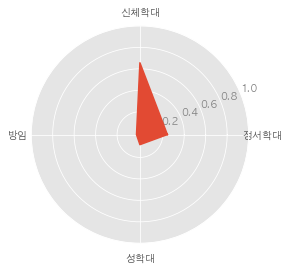

In [ ]:
categories = ['정서학대', '신체학대', '방임', '성학대']

N = len(categories)

values = np.round(pred_probs[19:20], 3).flatten().tolist()
values += values[:1]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.polar(angles, values)
plt.fill(angles, values)
plt.xticks(angles[:-1], categories)

plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], color = 'grey', size = 10)

plt.show()

### Test

In [ ]:
def sentiment_predict(new_sentence):
    if new_sentence != '':
        new_sentence1 = text_cleaning(new_sentence)
        new_sentence2 = rhinoMorph.onlyMorph_list(rn,new_sentence1, pos = ['NNG', 'NNP','NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi = False)
        new_sentence3 = [word for word in new_sentence2 if not word in SW] # 불용어 제거
        encoded = t.texts_to_sequences(new_sentence3)
        sum_list = [sum(encoded, [])]
        if sum_list != [[]]:
            padded = pad_sequences(sum_list, maxlen = max_len, value = 0, padding = 'pre')
            #pad_sequence에서 문제
            tokens = padded
            #     val = np.array([np.array(tokens)])
            pred_probs = model.predict(tokens) # 예측
            return pred_probs

In [ ]:
doc = input()
#엄마가 내몸을 만지고 아빠가 나를 때렸어요.

엄마가 내몸을 만지고 아빠가 나를 때렸어요.


In [ ]:
sentiment_predict(doc)

array([[0.4210315 , 0.5031898 , 0.02059281, 0.05518596]], dtype=float32)

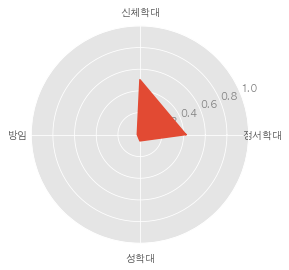

In [ ]:
categories = ['정서학대', '신체학대', '방임', '성학대']

N = len(categories)

values = np.round(sentiment_predict(doc), 3).flatten().tolist()
values += values[:1]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.polar(angles, values)
plt.fill(angles, values)
plt.xticks(angles[:-1], categories)

plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], color = 'grey', size = 10)

plt.show()